# Project - Group 15
Jennifer, Irene, Zac, Yi <br>
Stat 159

In [1]:
# Import necessary packages
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import scipy.stats
from opioidtools import utils

## Import Pre-processed Dataset

In [2]:
gdp_opioid=pd.read_csv('data/gdp_opioid.csv')
gdp_opioid

,Year,Series ID,State,Region Code,GDP_0101,Deaths,Population,Crude Rate,Prescriptions Dispensed by US Retailers in that year (millions)
0,2010,ALNQGSP,Alabama,1,177249.150,194.0,4779736.0,4.1,210.0
1,2011,ALNQGSP,Alabama,1,183916.625,180.0,4802740.0,3.7,219.0
2,2012,ALNQGSP,Alabama,1,189245.525,175.0,4822023.0,3.6,217.0
3,2013,ALNQGSP,Alabama,1,194786.925,175.0,4833722.0,3.6,207.0
4,2014,ALNQGSP,Alabama,1,197406.850,282.0,4849377.0,5.8,196.0
...,...,...,...,...,...,...,...,...,...
246,2010,WYNQGSP,Wyoming,56,37680.725,49.0,563626.0,8.7,210.0
247,2011,WYNQGSP,Wyoming,56,39751.375,47.0,568158.0,8.3,219.0
248,2012,WYNQGSP,Wyoming,56,38855.400,47.0,576412.0,8.2,217.0
249,2013,WYNQGSP,Wyoming,56,39289.775,52.0,582658.0,8.9,207.0


### EDA

In order to better understand the overall trends of crude rate of different states, we now create a visualization for the states with available data to see the change of crude rates from 2010 to 2014.

#### ToDo: move to package -> may create other viz for other variables e.g. deaths
parameters: variable name, y limit

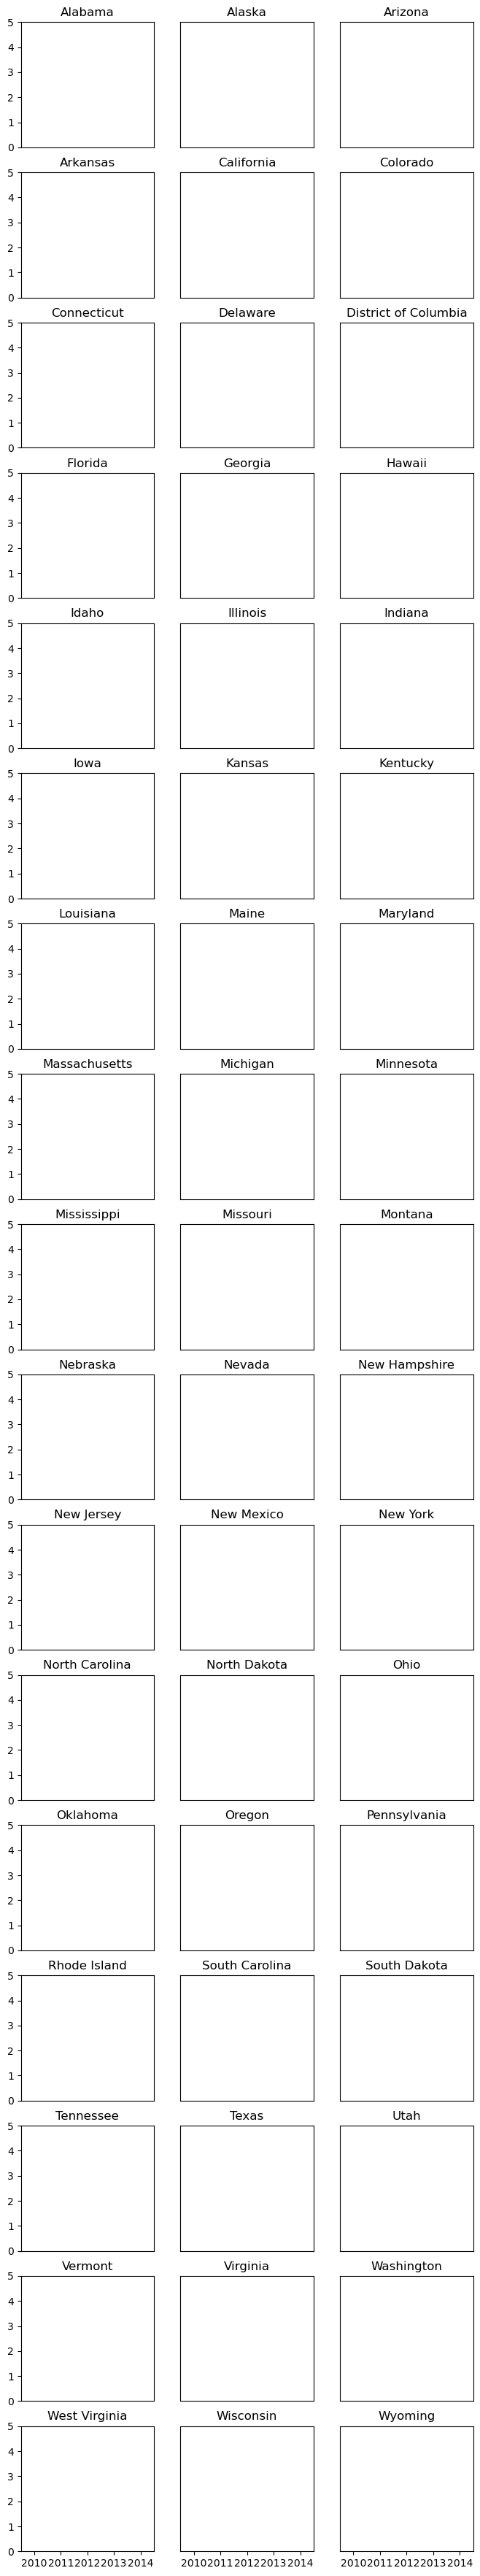

In [3]:
utils.state_viz(gdp_opioid, 'Deaths')

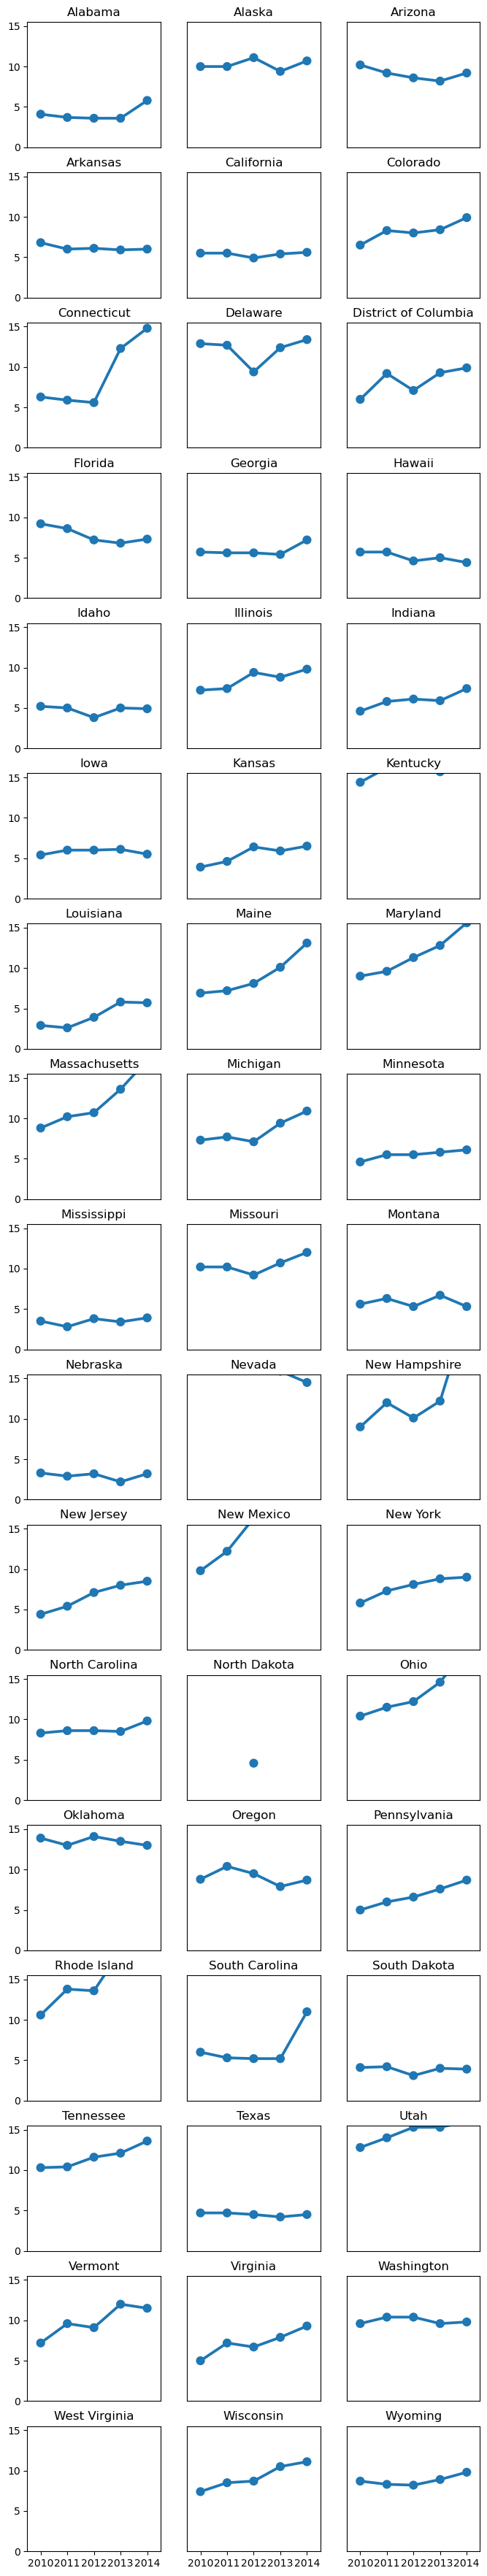

In [4]:
utils.state_viz(gdp_opioid, 'Crude Rate')

From the visualization above, we can obviously see that some states have higher crude rates than other states. Among the states with significantly high rates, the states have different changes over the 5 years. Some states have a positive trend, whereas others have a negative and then positive trend. The situation is quite complex to analyze as a whole. Therefore, we are going to compare states with low and high GDP over the 5 years rather than comparing all of them. 

### Research question: How significant the differences are in crude rate of the states with various levels of economic development?

# Initial Analysis:

In order to compare the states with the lowest GDP on average with those with the highest GDP on average from 2010-2014, we decided to use a T-test to see if there is a siginificant difference in the crude rate. The assumptions we made were the following: 
- large sample size is used
- each state of crude rate and other data relevant to opioid overdose deaths is independent of each other 
- the data collected follows a continuous or ordinal scale
- the data, when plotted, results in a normal distribution, bell-shaped distribution curve

#### Visualization of Average GDP for Each State over 2010-2014:

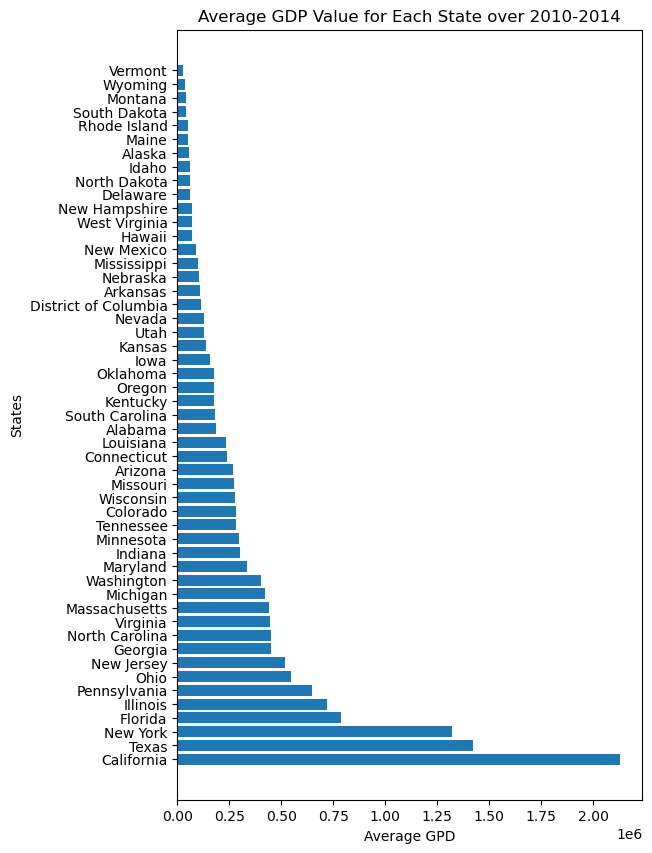

In [5]:
# Copy the merged dataset and use it for the analysis part
gdp_opioid_for_analysis = gdp_opioid

# Convert GDP_0101 column to a numeric data type
gdp_opioid_for_analysis['GDP_0101'] = pd.to_numeric(gdp_opioid_for_analysis['GDP_0101'], errors='coerce')

# Calculate the average GDP for each state over 2010 to 2014
state_avg_gdp_2010_to_2014 = gdp_opioid_for_analysis.groupby('State')['GDP_0101'].mean()

# Sorted the data to make the graph clearer
state_avg_gdp_sorted = state_avg_gdp_2010_to_2014.sort_values(ascending=False)

# Plot the data
plt.figure(figsize=(6,10))
plt.barh(state_avg_gdp_sorted.index, state_avg_gdp_sorted.values)
plt.xlabel('Average GPD')
plt.ylabel('States')
plt.title('Average GDP Value for Each State over 2010-2014')
plt.show()

### Find the minimum, median, and Maximum avg GDP among states over 2010 to 2014:

In [6]:
utils.avg_gdp_states(state_avg_gdp_sorted)

Minimum: 28891.08 State: Vermont
Median: 178983.00 State: South Carolina
Maximum: 2129273.11 State: California


#### Visualization of the Highest Average GDP State and the Lowest Average GDP State:

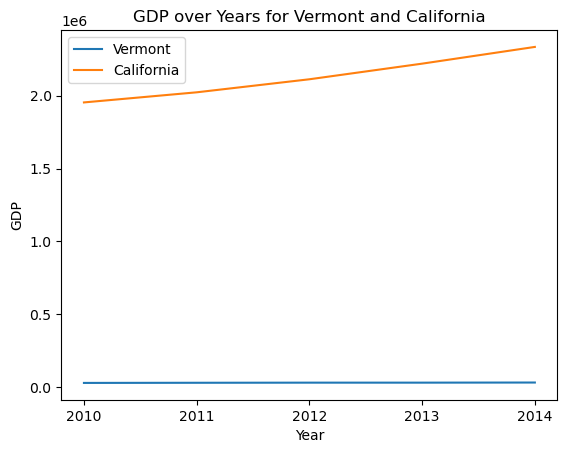

In [10]:
# Select the state with highest avg GDP, and the state with lowest avg GDP
gdp_state1 = gdp_opioid[(gdp_opioid["State"] == "Vermont")][["Year", "GDP_0101"]]
gdp_state2 = gdp_opioid[(gdp_opioid["State"] == "California")][["Year", "GDP_0101"]]

# Create a line plot of the GDP over years for the two states
plt.plot(gdp_state1["Year"], gdp_state1["GDP_0101"], label="Vermont")
plt.plot(gdp_state2["Year"], gdp_state2["GDP_0101"], label="California")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("GDP over Years for {} and {}".format("Vermont", "California"))

# x ticks format
plt.xticks(list(range(int(gdp_opioid.Year.min()), int(gdp_opioid.Year.max())+1)))

plt.legend()
plt.show()

### Hypothesis Testing: Highest average GDP state vs. Lowest average GDP state:

$ H0 $ = There is no significant difference in the crude rate between California and Vermont. 

$ H1 $ = There is a significant difference in the crude rate between California and Vermont.

In [11]:
#T test that compares the mean crude rate between California and Vermont. 
t_stat, p_value = scipy.stats.ttest_ind(gdp_opioid[gdp_opioid['State']=='California']['Crude Rate'],
                     gdp_opioid[gdp_opioid['State']=='Vermont']['Crude Rate'],
                     axis=0)

print("T-statistic:", t_stat)
print("p-value:", p_value)

T-statistic: -5.145630229646416
p-value: 0.0008790286706211422


### Rough Conclusion: 
The mean crude rate of California is significantly lower than the mean crude rate of Vermont, which indicates that the state with high GDP might have the lower crude rate than the state with low GDP. However, this is not strong and objective enough since it's just the comparation between two states. 

# Extended Analysis:
In the above analysis, there are only two states (the highest and the lowest average GDP over 2010 to 2014) were compared. In the following process, we are going to split the states into two parts, one is the states with the higher average GDP, the other one is the states with the lower average GDP. We will conduct the t-test to compare the mean values of the "Crude Rate" between these two parts to see if there is a significant diffference.

### Hypothesis Testing: High average GDP states vs. Low average GDP states

$ H_0 $ = There is no significant difference in the crude rate between the states with high average GDP and the states with lower average GDP

$ H_1 $ = There is a significant difference in the crude rate between the states with high average GDP and the states with lower average GDP


In [12]:
# crude rate from states with high and low avg GDP 
utils.high_low_crude_rates_ttest(state_avg_gdp_2010_to_2014,gdp_opioid)

T-statistic: -3.5543687730571776
p-value: 0.0004532330883314629


### Final Conclusion:
We found a T-statistic of -3.55 and a p-value of 0.00045 based on the output. The p-value is less than 0.05, which indicates that we reject the null hypothesis that there is no significant difference in the crude rate between the states with high average GDP and the states with lower average GDP. 

Therefore, we concluded that there is a statistically significant difference in the crude rate between these two groups of states. The t-statistic indicates that the crude rate of the states with higher average GDP is higher than the states with lower average GDP.

## Author Contributions 
Jenny:

Zac:
    
Irene:
    
Yi: